### 1.基本繪圖

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#定義繪圖函數
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i*.5)*(7-i)*flip)

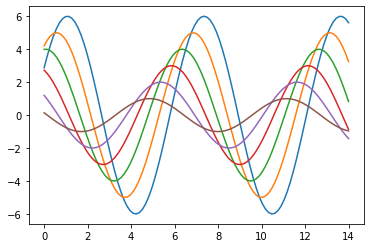

In [3]:
#使用matplotlib繪圖
sinplot()
plt.show()

seaborn默認的灰色網格底色靈感來源於matplotlib卻更加柔和。大多數情況下，圖應優於表。seaborn的默認灰色網格底色避免了刺目的干擾，對於多個方面的圖形尤其有用，是一些更複雜的工具的核心

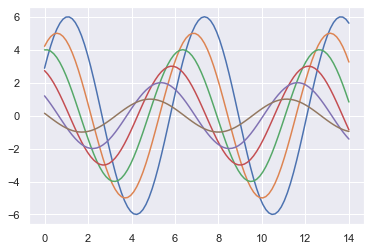

In [4]:
#使用seaborn繪圖
import seaborn as sns
sns.set() #使用seaborn默認設置
sinplot()
plt.show()

## 2.樣式控制
Seaborn將matplotlib參數分成兩個獨立的組。第一組設定了美學風格，第二組則是不同的度量元素，這樣就可以很容易地添加到代碼當中了。
操作這些參數的接口是兩對函數。
#### (1)控製樣式: axesstyle()和setstyle()函數。
#### (2)擴展繪圖: plotting_context()和set_context()函數。
在這兩種情況下，第一個函數返回一個參數字典，第二個函數則設置matplotlib默認屬性。

### 2-1-1 樣式控制：axes_style() and set_style()
##### 有5個seaborn的主題，適用於不同的應用和人群偏好：
##### darkgrid 黑色網格（默認）
##### whitegrid 白色網格
##### dark 黑色背景
##### white 白色背景
##### ticks 四周都有刻度線的白背景

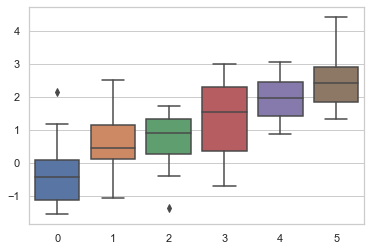

In [5]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

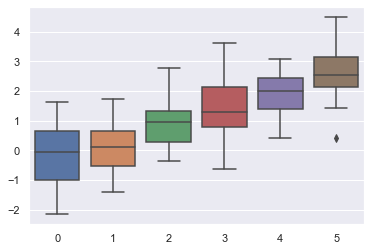

In [6]:
sns.set_style("darkgrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

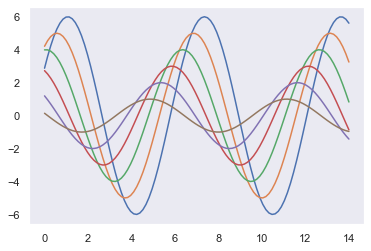

In [7]:
sns.set_style("dark")
sinplot()

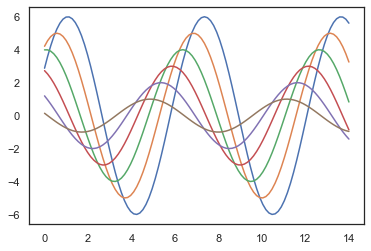

In [8]:
sns.set_style("white")
sinplot()

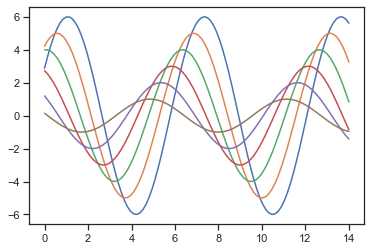

In [9]:
sns.set_style('ticks')
sinplot()

特別的可以通過sns.axes_style(style=None, rc=None) 返回一個sns.set_style()可傳的參數的字典

通過類似sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})的方式寫入更具體的配置樣式。

關於sns.axes_style()下面會有說明和運行結果

### 2-1-2用despine()進行邊框控制
#### despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
white和ticks參數的樣式(其他本來就沒有！)，都可以刪除上方和右方坐標軸上不需要的邊框，這在matplotlib中是無法通過參數實現的，卻可以在seaborn中通過despine()函數輕鬆移除他們。

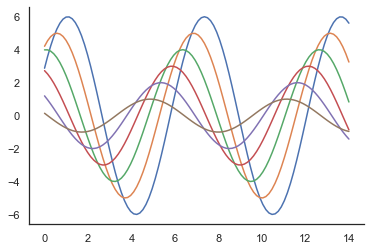

In [10]:
sns.set_style('white')
sinplot()
sns.despine()

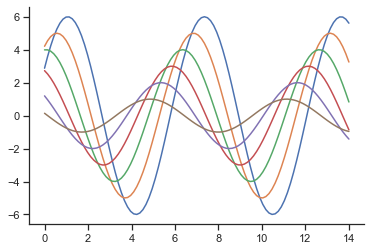

In [11]:
sns.set_style('ticks')
sinplot()
sns.despine()

一些圖的邊框可以通過數據移位，當然調用despine()也能做同樣的事。當邊框沒有覆蓋整個數據軸的範圍的時候，trim參數會限制留存的邊框範圍。

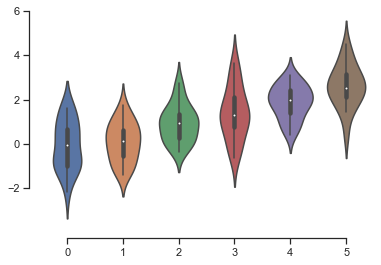

In [12]:
sns.set_style('ticks')
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True); # offset 两坐标轴离开距离；

也可以通過往despine()中添加參數去控制邊框

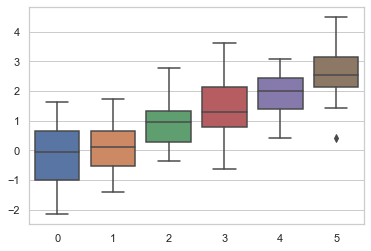

In [13]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
st = sns.axes_style("darkgrid")

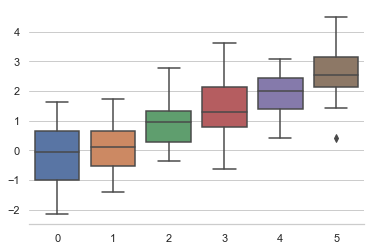

In [14]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True) # 刪除左邊框
st = sns.axes_style("darkgrid")

### 2-1-3臨時設定圖形樣式-->with語句(python)
雖然來回切換非常容易，但sns也允許用with語句中套用axes_style()達到臨時設置參數的效果（僅對with塊內的繪圖函數起作用）。這也允許創建不同風格的坐標軸。

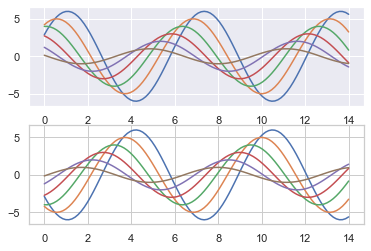

In [15]:
with sns.axes_style('darkgrid'):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

### 2-1-4 seaborn樣式中最重要的元素
如果您想要定制seanborn的樣式，可以將參數字典傳遞給axes_style()和set_style()的rc參數。注意，只能通過該方法覆蓋樣式定義的一部分參數。(然而，更高層次的set()函數接受任何matplotlib參數的字典)。
#### 參數可參考下面連結
#### https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.grid.html
如果您想要查看包含哪些參數，您可以只調用該函數而不帶參數，這將返回當前設置的字典:

In [16]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

試試不同種類的參數效果

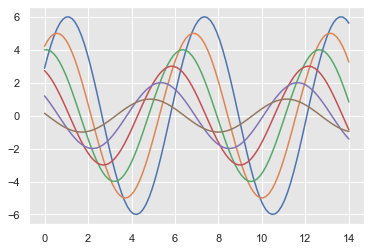

In [17]:
sns.set_style('darkgrid',{"axes.facecolor": ".9"})
sinplot()

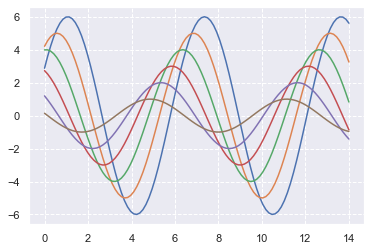

In [18]:
sns.set_style('darkgrid',{"grid.linestyle": '--'})
sinplot()

### 2-2 通過plotting_context() 和set_context() 調整繪圖元素
另一組參數控制繪圖元素的規模，這應該讓您使用相同的代碼來製作適合在較大或較小的情節適當的場景中使用的情節。

首先，可以通過sns.set()重置參數。

In [19]:
sns.set()

四種預設，按相對尺寸的順序(線條越來越粗)，分別是
#### paper
#### notebook
#### talk
#### poster
notebook的樣式是默認的，上面的繪圖都是使用默認的notebook預設。

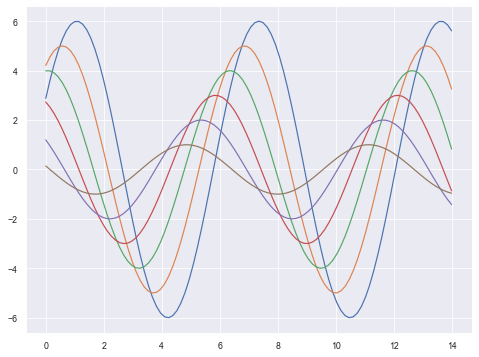

In [20]:
sns.set_context("paper")
plt.figure(figsize=(8,6))
sinplot()

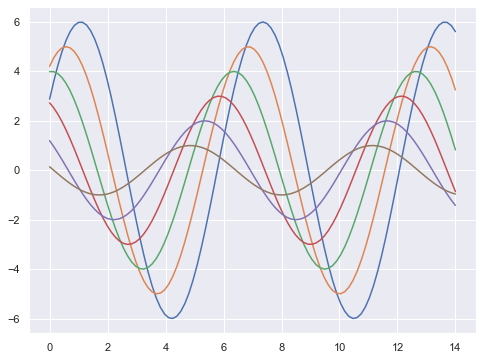

In [21]:
sns.set_context("notebook")
plt.figure(figsize=(8,6))
sinplot()

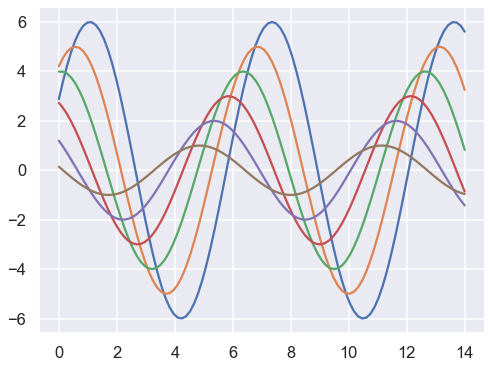

In [22]:
sns.set_context("talk")
plt.figure(figsize=(8,6))
sinplot()

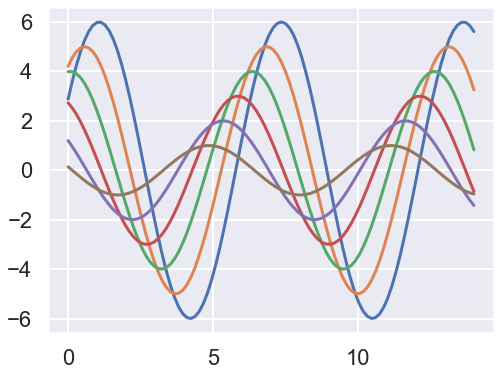

In [23]:
sns.set_context("poster")
plt.figure(figsize=(8,6))
sinplot()

練習畫多個子圖，以及子圖的索引方式，並一次匯出上述四種不同粗度的圖
fig=畫板, ax=子圖

In [24]:
size_line = ['paper','notebook','talk','poster']
def sinplot_all(flip=1,num_subplot=2):
    fig, ax = plt.subplots(num_subplot,1,figsize = (15,7))
    x = np.linspace(0, 14, 100)
    for num in range(0,num_subplot):
        sns.set_context(size_line[num])
        for i in range(1, 7):
            result = np.sin(x + i*.5)*(7-i)*flip
            ax[num].plot(x,result)

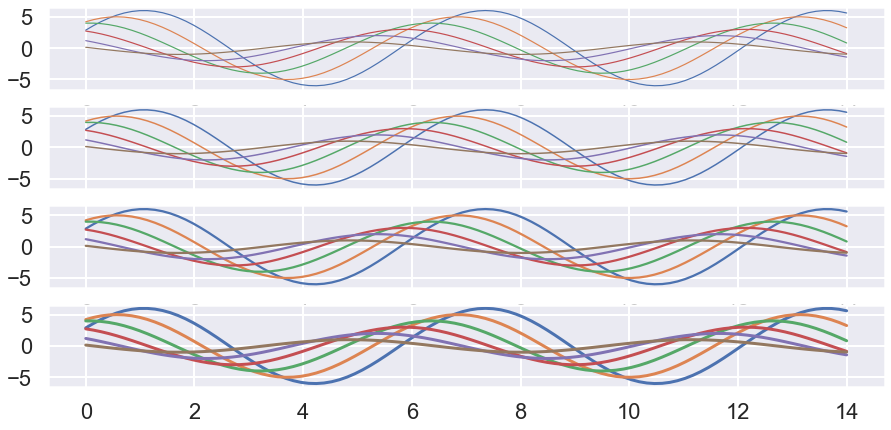

In [25]:
sinplot_all(num_subplot=4)

子圖二維索引（不適用1*N or N*1 子圖）

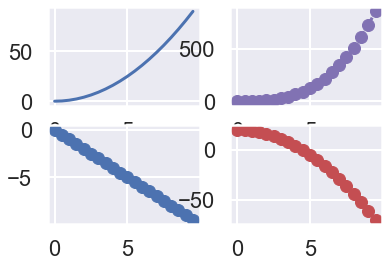

In [26]:
x =np.arange(0,10,0.5)
y1 = x*x
y2= x*x*x
y3= -1*x
y4= -x*x +20
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(x, y1, '-')
axes[0, 1].plot(x, y2, 'm--o')
axes[1, 0].plot(x, y3, 'b--o')
axes[1, 1].plot(x, y4, 'r--o')

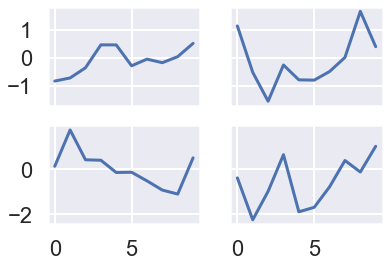

In [27]:
# plt.subplots example
# Data
x  = np.arange(0,10,1)
y1 = np.random.randn(10)
y2 = np.random.randn(10)
y3 = np.random.randn(10)
y4 = np.random.randn(10)

# Create subplots
fig, ax = plt.subplots(2,2, sharex='col', sharey='row')
ax[0][0].plot(x,y1)
ax[0][1].plot(x,y2)
ax[1][0].plot(x,y3)
ax[1][1].plot(x,y4)

類似的，還可以使用其中一個名稱來調用set_context()來設置參數，您可以通過提供參數值的字典來覆蓋參數。

通過更改context還可以獨立地擴展字體元素的大小。(這個選項也可以通過頂級set()函數獲得)

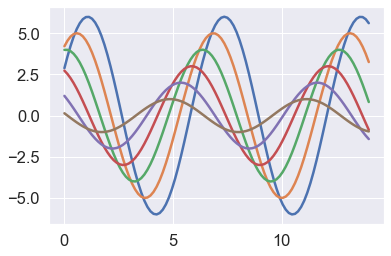

In [28]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

